<a href="https://colab.research.google.com/github/FGalvao77/-TUTORIAL---TensorFlow/blob/main/03_%5BTUTORIAL%5D_Como_carregar_dados_CSV_para_aplica%C3%A7%C3%A3o_no_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **03 - [TUTORIAL] Como carregar dados `CSV` para aplicação no _TensorFlow_**
---
---

<br>

Este tutorial fornece um exemplo de como carregar dados CSV de um arquivo em um `tf.data.Dataset`.

Os dados usados neste tutorial foram retirados da lista de passageiros do **Titanic88. O modelo preverá a probabilidade de sobrevivência de um passageiro com base em características como idade, sexo, classe de passagem e se a pessoa estava viajando sozinha.

Material base de consulta e orientação:
- https://www.tensorflow.org/tutorials/load_data/csv?hl=pt-br

<br>

#### **1. Setup**

In [1]:
try:
    # %tensorflow_version only exists in Colab
    %tensorflow_version 2.x
except Exception:
    pass

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals
import functools

import numpy as np
import tensorflow as tf

In [3]:
print(
    '[VERSION] -',
    f'NumPy: {np.__version__} |',
    f'TensorFlow: {tf.__version__}'
)

[VERSION] - NumPy: 1.21.6 | TensorFlow: 2.11.0


In [4]:
TRAIN_DATA_URL = 'https://storage.googleapis.com/tf-datasets/titanic/train.csv'

TEST_DATA_URL = 'https://storage.googleapis.com/tf-datasets/titanic/eval.csv'

In [5]:
train_file_path = tf.keras.utils.get_file('train.csv', TRAIN_DATA_URL)

test_file_path = tf.keras.utils.get_file('eval.csv', TEST_DATA_URL)

13049/13049 [==============================] - 0s 1us/step


In [6]:
# setando o ambiente para facilitar a leitura de valores numpy
np.set_printoptions(precision=3, suppress=True)

#### **2. Carregar dados**

Visualizando o conjunto de dados:
- `head`: 10 primeiras observações e,
- `tail`: 10 últimas observações.

In [7]:
!head {train_file_path}

survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.25,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
1,female,26.0,0,0,7.925,Third,unknown,Southampton,y
1,female,35.0,1,0,53.1,First,C,Southampton,n
0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y
0,male,2.0,3,1,21.075,Third,unknown,Southampton,n
1,female,27.0,0,2,11.1333,Third,unknown,Southampton,n
1,female,14.0,1,0,30.0708,Second,unknown,Cherbourg,n
1,female,4.0,1,1,16.7,Third,G,Southampton,n


In [8]:
!tail {train_file_path}

1,female,15.0,0,0,7.225,Third,unknown,Cherbourg,y
0,male,20.0,0,0,9.8458,Third,unknown,Southampton,y
0,male,19.0,0,0,7.8958,Third,unknown,Southampton,y
0,male,28.0,0,0,7.8958,Third,unknown,Southampton,y
0,female,22.0,0,0,10.5167,Third,unknown,Southampton,y
0,male,28.0,0,0,10.5,Second,unknown,Southampton,y
0,male,25.0,0,0,7.05,Third,unknown,Southampton,y
1,female,19.0,0,0,30.0,First,B,Southampton,y
0,female,28.0,1,2,23.45,Third,unknown,Southampton,n
0,male,32.0,0,0,7.75,Third,unknown,Queenstown,y


Você pode carregar isso usando pandas e passar as matrizes NumPy para o TensorFlow. Se você precisar escalar até um grande conjunto de arquivos ou precisar de um carregador que se integre ao TensorFlow e tf.data, use o `tf.data.experimental.make_csv_dataset`:

A única coluna que você precisa identificar explicitamente é aquela com o valor que o modelo pretende prever.

In [9]:
# instanciando a coluna dependente
LABEL_COLUMN = 'survived'

# instanciando o valor do rótulo
LABELS = [0, 1] # 0: não | 1: sim

In [10]:
# ?tf.data.experimental.make_csv_dataset

In [11]:
def get_dataset(file_path:str, **kwargs) -> str:
    dataset = tf.data.experimental.make_csv_dataset(
        file_pattern=file_path,
        batch_size=100, # utilizando somente 100 observações para análise
        label_name=LABEL_COLUMN,
        na_value='?',
        num_epochs=1,
        ignore_errors=True,
        encoding='utf-8',
        **kwargs
    )

    return dataset

In [12]:
raw_train_data = get_dataset(train_file_path)

raw_test_data = get_dataset(test_file_path)

Instructions for updating:
Use `tf.data.Dataset.ignore_errors` instead.


In [13]:
raw_train_data

<PrefetchDataset element_spec=(OrderedDict([('sex', TensorSpec(shape=(None,), dtype=tf.string, name=None)), ('age', TensorSpec(shape=(None,), dtype=tf.float32, name=None)), ('n_siblings_spouses', TensorSpec(shape=(None,), dtype=tf.int32, name=None)), ('parch', TensorSpec(shape=(None,), dtype=tf.int32, name=None)), ('fare', TensorSpec(shape=(None,), dtype=tf.float32, name=None)), ('class', TensorSpec(shape=(None,), dtype=tf.string, name=None)), ('deck', TensorSpec(shape=(None,), dtype=tf.string, name=None)), ('embark_town', TensorSpec(shape=(None,), dtype=tf.string, name=None)), ('alone', TensorSpec(shape=(None,), dtype=tf.string, name=None))]), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [14]:
raw_test_data

<PrefetchDataset element_spec=(OrderedDict([('sex', TensorSpec(shape=(None,), dtype=tf.string, name=None)), ('age', TensorSpec(shape=(None,), dtype=tf.float32, name=None)), ('n_siblings_spouses', TensorSpec(shape=(None,), dtype=tf.int32, name=None)), ('parch', TensorSpec(shape=(None,), dtype=tf.int32, name=None)), ('fare', TensorSpec(shape=(None,), dtype=tf.float32, name=None)), ('class', TensorSpec(shape=(None,), dtype=tf.string, name=None)), ('deck', TensorSpec(shape=(None,), dtype=tf.string, name=None)), ('embark_town', TensorSpec(shape=(None,), dtype=tf.string, name=None)), ('alone', TensorSpec(shape=(None,), dtype=tf.string, name=None))]), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [15]:
def show_batch(dataset:str) -> str:
    for batch, label in dataset.take(1):
        for key, value in batch.items():
            print('{:20s}: {}'.format(key, value.numpy()))

Cada item do conjunto de dados é um lote, representado como uma tupla de (* muitos exemplos *, * muitos rótulos *). Os dados dos exemplos são organizados em tensores baseados em colunas (em vez de tensores baseados em linhas), cada um com tantos elementos quanto o tamanho do lote (5 neste caso).

Pode ajudar a ver isso por si mesmo.

In [16]:
show_batch(dataset=raw_train_data)

sex                 : [b'female' b'male' b'female' b'male' b'male' b'female' b'female' b'male'
 b'female' b'male' b'female' b'male' b'male' b'female' b'female' b'male'
 b'female' b'male' b'male' b'male' b'male' b'female' b'male' b'female'
 b'male' b'female' b'female' b'female' b'male' b'male' b'female' b'male'
 b'female' b'male' b'male' b'male' b'male' b'male' b'male' b'female'
 b'male' b'male' b'male' b'male' b'male' b'male' b'male' b'male' b'female'
 b'male' b'male' b'female' b'female' b'male' b'male' b'female' b'male'
 b'male' b'male' b'male' b'male' b'male' b'female' b'male' b'male'
 b'female' b'male' b'female' b'male' b'male' b'male' b'male' b'male'
 b'male' b'female' b'female' b'male' b'male' b'male' b'male' b'male'
 b'female' b'male' b'male' b'female' b'male' b'male' b'male' b'male'
 b'female' b'female' b'female' b'male' b'female' b'male' b'male' b'male'
 b'male' b'male' b'male']
age                 : [60.  28.   4.  17.  20.  21.  30.  28.  52.  26.  23.  18.  45.  23.
 24.  49

Como você pode ver, as colunas no CSV são nomeadas. O construtor do conjunto de dados selecionará esses nomes automaticamente. Se o arquivo com o qual você está trabalhando não contém os nomes das colunas na primeira linha, passe-os em uma lista de strings para o argumento `column_names` na função `make_csv_dataset`.

In [17]:
CSV_COLMUNS = ['survived', 'sex', 'age', 'n_siblings_spouses', 'parch', 
               'fare', 'class', 'deck', 'embark_town', 'alone']

In [18]:
temp_dataset = get_dataset(
    file_path=train_file_path,
    column_names=CSV_COLMUNS
)

show_batch(dataset=temp_dataset)

sex                 : [b'male' b'female' b'male' b'female' b'male' b'male' b'male' b'male'
 b'male' b'male' b'male' b'male' b'male' b'male' b'female' b'female'
 b'female' b'male' b'male' b'male' b'male' b'male' b'female' b'male'
 b'female' b'male' b'male' b'female' b'male' b'female' b'female' b'male'
 b'male' b'male' b'male' b'male' b'male' b'female' b'female' b'male'
 b'male' b'male' b'male' b'female' b'female' b'female' b'female' b'male'
 b'female' b'male' b'male' b'female' b'male' b'female' b'female' b'male'
 b'female' b'male' b'female' b'male' b'male' b'male' b'female' b'male'
 b'male' b'male' b'male' b'male' b'male' b'male' b'male' b'male' b'male'
 b'female' b'female' b'male' b'male' b'male' b'male' b'male' b'male'
 b'male' b'female' b'male' b'male' b'male' b'male' b'male' b'male' b'male'
 b'female' b'male' b'male' b'female' b'male' b'male' b'male' b'female'
 b'male' b'female']
age                 : [49.   48.   26.   28.   48.   28.   28.   28.   28.   16.   33.   28.
 31.   28. 

Este exemplo vai usar todas as colunas disponíveis. Se você precisar omitir algumas colunas do conjunto de dados, crie uma lista apenas das colunas que planeja usar e passe-a para o argumento (opcional) `select_columns` do construtor.

In [19]:
SELECT_COLUMNS = ['survived', 'age', 'n_siblings_spouses', 
                  'class', 'deck', 'alone']

In [20]:
temp_dataset = get_dataset(
    file_path=train_file_path,
    select_columns=SELECT_COLUMNS
)

show_batch(dataset=temp_dataset)

age                 : [28.  19.  23.  47.  46.   7.  28.  29.  16.  23.  42.  40.  38.  25.
 58.  28.  43.  50.  28.  14.  28.  42.  28.  21.  14.  18.  28.  19.
 28.   3.  51.  18.  44.  28.  28.  24.   2.  30.  28.  24.  23.  22.
 38.  19.  24.  28.  24.  58.  34.  28.  57.   4.  34.  45.  31.  29.
 15.  31.  39.  40.  23.  35.  28.5 40.   6.  40.5 34.  21.  46.  64.
 28.  32.  30.  47.  32.  28.  22.  51.   9.  39.  28.  28.  28.  18.
 71.  18.   4.  41.  28.   1.  28.  24.  60.  28.  52.  28.  60.  10.
 30.  37. ]
n_siblings_spouses  : [0 0 0 1 1 0 0 0 0 3 0 1 0 0 0 0 0 1 0 1 0 1 0 2 5 1 2 0 0 1 0 0 0 0 8 0 4
 1 1 2 0 0 1 0 0 1 0 0 0 8 0 4 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 4 0 0 0 0 0 0 0 0 0 1 5 0 0 0 0 1 0 1 3 0 1]
class               : [b'Third' b'Third' b'Second' b'Third' b'First' b'Second' b'Third' b'Third'
 b'Third' b'First' b'Third' b'Third' b'First' b'Third' b'First' b'Third'
 b'Third' b'First' b'Third' b'Third' b'Third' b'First' b'Third' b'First'
 b'Thir

#### **3. Pré-processamento dos dados**

Um arquivo CSV pode conter uma variedade de tipos de dados. Normalmente, você deseja converter desses tipos mistos em um vetor de comprimento fixo antes de alimentar os dados em seu modelo.

O TensorFlow possui um sistema interno para descrever conversões de entrada comuns: `tf.feature_column`, consulte este tutorial para detalhes.

Você pode pré-processar seus dados usando qualquer ferramenta que desejar (como nltk ou sklearn) e apenas passar a saída processada para o TensorFlow.

A principal vantagem de fazer o pré-processamento dentro do seu modelo é que, quando você exporta o modelo, ele inclui o pré-processamento. Dessa forma, você pode passar os dados brutos diretamente para o seu modelo.

**Dados contínuos**

Se seus dados já estiverem em um formato numérico apropriado, você poderá compactá-los em um vetor antes de transmiti-los ao modelo:

In [21]:
SELECT_COLUMNS = ['survived', 'age', 'n_siblings_spouses', 
                  'parch', 'fare']

In [22]:
DEFAULTS = [0, 0.0, 0.0, 0.0, 0.0]

In [23]:
temp_dataset = get_dataset(
    file_path=train_file_path,
    select_columns=SELECT_COLUMNS,
    column_defaults=DEFAULTS
)

show_batch(dataset=temp_dataset)

age                 : [24.  23.  28.  50.  18.  70.5 63.  45.   9.  28.  39.  28.  31.  22.
 45.  47.  28.  19.  40.  19.  32.5 28.  35.   5.  14.  42.  34.  64.
 40.  27.  19.  28.  39.  28.  19.  28.  30.  16.  22.  59.  17.  24.
 28.  28.  28.  28.  28.  22.  28.  24.  28.   2.  51.  28.  34.  27.
 49.  18.  21.  25.  44.  18.  36.  44.  25.  28.  28.  21.  10.  29.
 28.  28.  15.  28.  28.  32.   7.  28.  55.5 31.   4.   3.  28.  21.
 31.  28.  28.  23.  40.5 19.  25.  39.  34.  16.  30.5 28.  66.  28.
 44.  28. ]
n_siblings_spouses  : [0. 0. 1. 1. 0. 0. 0. 0. 4. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0.
 1. 1. 1. 1. 1. 0. 3. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 2. 1.
 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 2. 1. 1. 1. 0. 0. 1. 0. 0. 0. 3. 0. 0. 0.
 1. 0. 0. 0. 4. 8. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1.
 0. 0. 0. 1.]
parch               : [1. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 1. 0. 0. 0. 0. 0. 4. 0. 0. 0. 0. 0.
 0. 0. 1. 4. 1. 2. 2. 2. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0

In [24]:
example_batch, labels_batch = next(iter(temp_dataset))

Aqui está uma função simples que agrupará todas as colunas:

In [25]:
def pack(features:str, label:str) -> str:
    return tf.stack(list(features.values()), axis=1), label

Aplique isso a cada elemento do conjunto de dados:

In [26]:
packed_dataset = temp_dataset.map(pack)

for features, labels in packed_dataset.take(1):
    print(features.numpy())
    print()
    print(labels.numpy())

[[ 28.      3.      1.     25.467]
 [ 22.      1.      0.      7.25 ]
 [ 22.      1.      1.     29.   ]
 [ 18.      0.      0.      9.842]
 [ 36.      1.      0.     15.55 ]
 [ 28.      8.      2.     69.55 ]
 [ 30.5     0.      0.      8.05 ]
 [ 42.      0.      0.      7.55 ]
 [ 28.      1.      0.     19.967]
 [ 32.      0.      0.      7.854]
 [ 28.      0.      0.     47.1  ]
 [ 33.      0.      0.     12.275]
 [ 28.      0.      0.      0.   ]
 [ 42.      0.      0.    227.525]
 [ 28.      0.      0.      8.05 ]
 [ 29.      0.      0.      9.5  ]
 [  2.      0.      1.     12.288]
 [  9.      5.      2.     46.9  ]
 [ 41.      0.      0.      7.125]
 [  5.      2.      1.     19.258]
 [ 45.      1.      1.    164.867]
 [ 29.      1.      0.     27.721]
 [ 17.      0.      0.      8.663]
 [ 26.      0.      0.      8.05 ]
 [ 21.      0.      1.     77.287]
 [ 28.      0.      0.     35.5  ]
 [ 48.      1.      2.     65.   ]
 [ 23.      0.      0.     13.   ]
 [ 32.      0.      

Se você tiver tipos de dados mistos, poderá separar esses campos numéricos simples. A API `tf.feature_column` pode lidar com eles, mas isso gera alguma sobrecarga e deve ser evitado, a menos que seja realmente necessário. Volte para o conjunto de dados misto:

In [27]:
show_batch(raw_train_data)

sex                 : [b'male' b'male' b'male' b'male' b'male' b'female' b'female' b'male'
 b'male' b'male' b'female' b'male' b'male' b'female' b'female' b'male'
 b'male' b'male' b'male' b'male' b'male' b'male' b'female' b'male'
 b'female' b'female' b'male' b'male' b'female' b'male' b'male' b'male'
 b'male' b'male' b'male' b'female' b'female' b'male' b'male' b'male'
 b'male' b'male' b'male' b'male' b'male' b'female' b'male' b'male' b'male'
 b'male' b'male' b'male' b'male' b'male' b'female' b'female' b'male'
 b'female' b'male' b'female' b'female' b'male' b'male' b'male' b'male'
 b'male' b'female' b'female' b'female' b'female' b'female' b'male' b'male'
 b'female' b'female' b'female' b'male' b'male' b'female' b'female' b'male'
 b'female' b'male' b'male' b'male' b'male' b'male' b'male' b'female'
 b'male' b'male' b'male' b'male' b'female' b'female' b'male' b'female'
 b'female' b'male' b'male']
age                 : [28.   27.   34.   70.   36.   28.   28.   39.   16.   28.   38.   30.
  4. 

In [28]:
example_batch, labels_batch = next(iter(temp_dataset))

Portanto, defina um _pré-processador_ mais geral que selecione uma lista de recursos numéricos e os agrupe em uma única coluna:

In [29]:
class PackNumericFeatures(object):
    def __init__(self, names:str):
        self.names = names

    def __call__(self, features:str, labels:str):
        numeric_features = [features.pop(name) for name in self.names]
        numeric_features = [tf.cast(feat, tf.float32) for feat in numeric_features]
        numeric_features = tf.stack(numeric_features, axis=-1)

        features['numeric'] = numeric_features
        return features, labels

In [30]:
NUMERIC_FEATURES = ['age', 'n_siblings_spouses', 'parch', 'fare']

packed_train_data = raw_train_data.map(
    PackNumericFeatures(NUMERIC_FEATURES)
)

packed_test_data = raw_test_data.map(
    PackNumericFeatures(NUMERIC_FEATURES)
)

In [31]:
show_batch(packed_train_data)

sex                 : [b'male' b'male' b'female' b'female' b'male' b'male' b'female' b'male'
 b'female' b'male' b'male' b'female' b'female' b'female' b'male' b'male'
 b'female' b'male' b'male' b'female' b'male' b'female' b'male' b'male'
 b'male' b'female' b'female' b'male' b'male' b'male' b'male' b'male'
 b'female' b'female' b'female' b'female' b'female' b'male' b'male' b'male'
 b'male' b'male' b'female' b'male' b'female' b'male' b'male' b'male'
 b'male' b'male' b'female' b'male' b'female' b'female' b'female' b'male'
 b'male' b'female' b'female' b'male' b'male' b'male' b'male' b'male'
 b'male' b'male' b'female' b'male' b'male' b'male' b'female' b'male'
 b'female' b'male' b'male' b'male' b'male' b'female' b'male' b'male'
 b'female' b'male' b'male' b'female' b'female' b'female' b'female'
 b'female' b'female' b'male' b'female' b'male' b'male' b'male' b'female'
 b'male' b'male' b'female' b'male' b'male']
class               : [b'Third' b'Third' b'Third' b'Third' b'Third' b'Third' b'Third' 

In [32]:
example_batch, labels_batch = next(iter(packed_train_data))

**Normalização dos dados**

Dados contínuos sempre devem ser normalizados.

In [33]:
import pandas as pd

In [34]:
desc = pd.read_csv(filepath_or_buffer=train_file_path)[NUMERIC_FEATURES].describe()

In [35]:
desc.T

,count,mean,std,min,25%,50%,75%,max
age,627.0,29.631308,12.511818,0.75,23.0000,28.0000,35.0000,80.0000
n_siblings_spouses,627.0,0.545455,1.151090,0.00,0.0000,0.0000,1.0000,8.0000
parch,627.0,0.379585,0.792999,0.00,0.0000,0.0000,0.0000,5.0000
fare,627.0,34.385399,54.597730,0.00,7.8958,15.0458,31.3875,512.3292


In [36]:
MEAN = np.array(desc.T['mean'])

STD = np.array(desc.T['std'])

In [37]:
MEAN

array([29.631,  0.545,  0.38 , 34.385])

In [38]:
STD

array([12.512,  1.151,  0.793, 54.598])

In [39]:
def normalize_numeric_data(data:str, mean:eval, std:eval):
    return (data-mean) / std

Agora crie uma coluna numérica. A API `tf.feature_columns.numeric_column` aceita um argumento `normalizer_fn`, que será executado em cada lote.

Ligue o `MEAN` e o `STD` ao normalizador fn usando `functools.partial`




In [40]:
normalizer = functools.partial(
    normalize_numeric_data,
    mean=MEAN,
    std=STD
)

In [41]:
numeric_column = tf.feature_column.numeric_column('numeric', 
                                                  normalizer_fn=normalizer,
                                                  shape=[len(NUMERIC_FEATURES)])

numeric_column

NumericColumn(key='numeric', shape=(4,), default_value=None, dtype=tf.float32, normalizer_fn=functools.partial(<function normalize_numeric_data at 0x7f0c682571f0>, mean=array([29.631,  0.545,  0.38 , 34.385]), std=array([12.512,  1.151,  0.793, 54.598])))

In [42]:
numeric_columns = [numeric_column]

Ao treinar o modelo, inclua esta coluna de característica para selecionar e centralizar este bloco de dados numéricos:




In [43]:
example_batch['numeric']

<tf.Tensor: shape=(100, 4), dtype=float32, numpy=
array([[ 80.   ,   0.   ,   0.   ,  30.   ],
       [ 44.   ,   0.   ,   1.   ,  57.979],
       [ 30.   ,   0.   ,   0.   ,  27.75 ],
       [ 70.   ,   1.   ,   1.   ,  71.   ],
       [ 34.   ,   1.   ,   0.   ,  26.   ],
       [ 28.   ,   0.   ,   0.   ,   0.   ],
       [ 44.   ,   0.   ,   1.   ,  16.1  ],
       [ 28.   ,   0.   ,   0.   ,   0.   ],
       [ 28.   ,   0.   ,   0.   ,   7.229],
       [ 28.   ,   0.   ,   0.   ,   7.896],
       [ 30.   ,   0.   ,   0.   ,  93.5  ],
       [ 28.   ,   0.   ,   0.   ,   7.796],
       [ 26.   ,   0.   ,   0.   ,   7.896],
       [ 22.   ,   0.   ,   2.   ,  49.5  ],
       [ 18.   ,   0.   ,   0.   ,  73.5  ],
       [ 28.   ,   8.   ,   2.   ,  69.55 ],
       [ 28.   ,   0.   ,   0.   ,   7.312],
       [ 25.   ,   0.   ,   0.   ,   7.05 ],
       [ 25.   ,   1.   ,   0.   ,  17.8  ],
       [ 28.   ,   0.   ,   0.   , 227.525],
       [ 28.   ,   1.   ,   0.   ,  82.171],
     

In [44]:
numeric_layer = tf.keras.layers.DenseFeatures(numeric_columns)

numeric_layer(example_batch).numpy()

array([[ 4.026, -0.474, -0.479, -0.08 ],
       [ 1.148, -0.474,  0.782,  0.432],
       [ 0.029, -0.474, -0.479, -0.122],
       [ 3.226,  0.395,  0.782,  0.671],
       [ 0.349,  0.395, -0.479, -0.154],
       [-0.13 , -0.474, -0.479, -0.63 ],
       [ 1.148, -0.474,  0.782, -0.335],
       [-0.13 , -0.474, -0.479, -0.63 ],
       [-0.13 , -0.474, -0.479, -0.497],
       [-0.13 , -0.474, -0.479, -0.485],
       [ 0.029, -0.474, -0.479,  1.083],
       [-0.13 , -0.474, -0.479, -0.487],
       [-0.29 , -0.474, -0.479, -0.485],
       [-0.61 , -0.474,  2.043,  0.277],
       [-0.93 , -0.474, -0.479,  0.716],
       [-0.13 ,  6.476,  2.043,  0.644],
       [-0.13 , -0.474, -0.479, -0.496],
       [-0.37 , -0.474, -0.479, -0.501],
       [-0.37 ,  0.395, -0.479, -0.304],
       [-0.13 , -0.474, -0.479,  3.538],
       [-0.13 ,  0.395, -0.479,  0.875],
       [ 0.829,  0.395, -0.479, -0.456],
       [-0.69 , -0.474, -0.479,  0.798],
       [ 0.509, -0.474,  2.043,  0.671],
       [-0.13 , 

A normalização baseada em média usada aqui requer conhecer os meios de cada coluna antes do tempo.

**Dados categóricos**

Algumas das colunas nos dados CSV são colunas categóricas. Ou seja, o conteúdo deve ser um dentre um conjunto limitado de opções.

Use a API `tf.feature_column` para criar uma coleção com uma `tf.feature_column.indicator_column` para cada coluna categórica.



In [45]:
CATEGORIES = {
    'sex': ['male', 'female'],
    'class': ['First', 'Second', 'Third'],
    'deck': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
    'embark_town': ['Cherbourg', 'Southhampton', 'Queenstown'],
    'alone': ['y', 'n']
}

CATEGORIES 

{'sex': ['male', 'female'],
 'class': ['First', 'Second', 'Third'],
 'deck': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
 'embark_town': ['Cherbourg', 'Southhampton', 'Queenstown'],
 'alone': ['y', 'n']}

In [46]:
('A B C D E F G H I J').split()

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']

In [47]:
CATEGORIES = {
    'sex': ('male female').split(),
    'class': ('First Second Third').split(),
    'deck': ('A B C D E F G H I J').split(),
    'embark_town': ('Cherbourg Southhampton Queenstown').split(),
    'alone': ('y n').split()
}

CATEGORIES

{'sex': ['male', 'female'],
 'class': ['First', 'Second', 'Third'],
 'deck': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
 'embark_town': ['Cherbourg', 'Southhampton', 'Queenstown'],
 'alone': ['y', 'n']}

In [48]:
categorical_columns = []

for feature, vocab in CATEGORIES.items():
    cat_col = tf.feature_column.categorical_column_with_vocabulary_list(
        key=feature, vocabulary_list=vocab
    )

    categorical_columns.append(tf.feature_column.indicator_column(cat_col))

In [49]:
categorical_columns

[IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='class', vocabulary_list=('First', 'Second', 'Third'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='deck', vocabulary_list=('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Cherbourg', 'Southhampton', 'Queenstown'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='alone', vocabulary_list=('y', 'n'), dtype=tf.string, default_value=-1, num_oov_buckets=0))]

In [50]:
categorical_layer = tf.keras.layers.DenseFeatures(categorical_columns)

In [51]:
print(categorical_layer(example_batch).numpy()[0])

[1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


Isso fará parte de uma entrada de processamento de dados posteriormente, quando você construir o modelo.



**Camada combinada de pré-processamento**

Adicione as duas coleções de colunas de recursos e passe-as para um `tf.keras.layers.DenseFeatures` para criar uma camada de entrada que extrairá e pré-processará os dois tipos de entrada:

In [52]:
preprocessing_layer = tf.keras.layers.DenseFeatures(categorical_columns + numeric_columns)

In [53]:
print(preprocessing_layer(example_batch).numpy()[0])

[ 1.     0.     1.     0.     0.     1.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     4.026 -0.474
 -0.479 -0.08   1.     0.   ]


#### **4. Construir o modelo**

Crie um `tf.keras.Sequential`, começando com o `preprocessing_layer`.

In [54]:
model = tf.keras.Sequential([
    preprocessing_layer, 
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [55]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['accuracy']
)

#### **5.Treinar, avaliar, e prever**


Agora o modelo pode ser instanciado e treinado.

In [56]:
train_data = packed_train_data.shuffle(500)
test_data = packed_test_data

In [57]:
model.fit(train_data, epochs=20, 
          validation_data=test_data)

Epoch 1/20


      1/Unknown - 4s 4s/step - loss: 0.7131 - accuracy: 0.6400

7/7 [==============================] - 6s 429ms/step - loss: 0.6582 - accuracy: 0.6124 - val_loss: 0.6008 - val_accuracy: 0.6288
Epoch 2/20
7/7 [==============================] - 0s 39ms/step - loss: 0.5542 - accuracy: 0.6587 - val_loss: 0.5425 - val_accuracy: 0.7159
Epoch 3/20
7/7 [==============================] - 1s 48ms/step - loss: 0.4926 - accuracy: 0.7464 - val_loss: 0.5038 - val_accuracy: 0.7462
Epoch 4/20
7/7 [==============================] - 0s 39ms/step - loss: 0.4553 - accuracy: 0.7847 - val_loss: 0.4778 - val_accuracy: 0.7727
Epoch 5/20
7/7 [==============================] - 0s 57ms/step - loss: 0.4286 - accuracy: 0.8150 - val_loss: 0.4648 - val_accuracy: 0.7879
Epoch 6/20
7/7 [==============================] - 1s 86ms/step - loss: 0.4128 - accuracy: 0.8293 - val_loss: 0.4584 - val_accuracy: 0.7917
Epoch 7/20
7/7 [==============================] - 1s 115ms/step - loss: 0.4048 - accuracy: 0.8262 - val_loss: 0.4559 - val_accuracy: 0.7917
Epoch 8/20
7/7 [====================

Depois que o modelo é treinado, você pode verificar sua acurácia no conjunto `test_data`.

In [58]:
test_loss, test_accuracy = model.evaluate(test_data)

print('\n\nTest Loss: {} | Test Accuracy: {}'.format(test_loss, test_accuracy))

3/3 [==============================] - 0s 16ms/step - loss: 0.4383 - accuracy: 0.8258


Test Loss: 0.43833836913108826 | Test Accuracy: 0.8257575631141663


Use `tf.keras.Model.predict` para inferir rótulos em um lote ou em um conjunto de dados de lotes.

In [59]:
predictions = model.predict(test_data)

for prediction, survived in zip(predictions[:10], list(test_data)[0][1][:10]):
    print('Predicted survival: {:.2%}'.format(prediction[0]),
          ' | Actual outcome: ',
          ('SURVIVED' if bool(survived) else 'DIED'))

3/3 [==============================] - 1s 15ms/step
Predicted survival: 42.11%  | Actual outcome:  DIED
Predicted survival: 389.54%  | Actual outcome:  DIED
Predicted survival: 37.39%  | Actual outcome:  DIED
Predicted survival: 29.65%  | Actual outcome:  DIED
Predicted survival: -43.78%  | Actual outcome:  SURVIVED
Predicted survival: 218.56%  | Actual outcome:  DIED
Predicted survival: 161.74%  | Actual outcome:  SURVIVED
Predicted survival: -13.55%  | Actual outcome:  SURVIVED
Predicted survival: -205.13%  | Actual outcome:  DIED
Predicted survival: 139.54%  | Actual outcome:  DIED


In [60]:
EPOCHS = 30

history = model.fit(train_data, epochs=EPOCHS, 
                    validation_data=test_data)

Epoch 1/30
7/7 [==============================] - 0s 68ms/step - loss: 0.3586 - accuracy: 0.8549 - val_loss: 0.4477 - val_accuracy: 0.8182
Epoch 2/30
7/7 [==============================] - 0s 24ms/step - loss: 0.3560 - accuracy: 0.8453 - val_loss: 0.4345 - val_accuracy: 0.8182
Epoch 3/30
7/7 [==============================] - 0s 39ms/step - loss: 0.3488 - accuracy: 0.8533 - val_loss: 0.4377 - val_accuracy: 0.8144
Epoch 4/30
7/7 [==============================] - 0s 31ms/step - loss: 0.3485 - accuracy: 0.8437 - val_loss: 0.4283 - val_accuracy: 0.8295
Epoch 5/30
7/7 [==============================] - 0s 33ms/step - loss: 0.3464 - accuracy: 0.8437 - val_loss: 0.4314 - val_accuracy: 0.8295
Epoch 6/30
7/7 [==============================] - 0s 45ms/step - loss: 0.3434 - accuracy: 0.8469 - val_loss: 0.4315 - val_accuracy: 0.8333
Epoch 7/30
7/7 [==============================] - 0s 31ms/step - loss: 0.3407 - accuracy: 0.8549 - val_loss: 0.4249 - val_accuracy: 0.8333
Epoch 8/30
7/7 [===========

In [61]:
history.history

{'loss': [0.35856133699417114,
  0.3559688925743103,
  0.34880802035331726,
  0.3484901487827301,
  0.3464476764202118,
  0.3434212803840637,
  0.340709924697876,
  0.33842673897743225,
  0.3361249268054962,
  0.33291274309158325,
  0.33280953764915466,
  0.3302273154258728,
  0.32722121477127075,
  0.327571839094162,
  0.32401394844055176,
  0.3226124048233032,
  0.3216422200202942,
  0.32308298349380493,
  0.31950703263282776,
  0.31691327691078186,
  0.3146587610244751,
  0.3156889081001282,
  0.3121761679649353,
  0.3099035620689392,
  0.3068755567073822,
  0.30603280663490295,
  0.3033793270587921,
  0.3035846948623657,
  0.3050065338611603,
  0.29981759190559387],
 'accuracy': [0.8548644185066223,
  0.8452950716018677,
  0.8532695174217224,
  0.8437001705169678,
  0.8437001705169678,
  0.8468899726867676,
  0.8548644185066223,
  0.8516746163368225,
  0.8516746163368225,
  0.8484848737716675,
  0.8564593195915222,
  0.8548644185066223,
  0.859649121761322,
  0.8580542206764221,
  

In [62]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [63]:
# instanciando as métricas do modelo
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [64]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('fivethirtyeight')

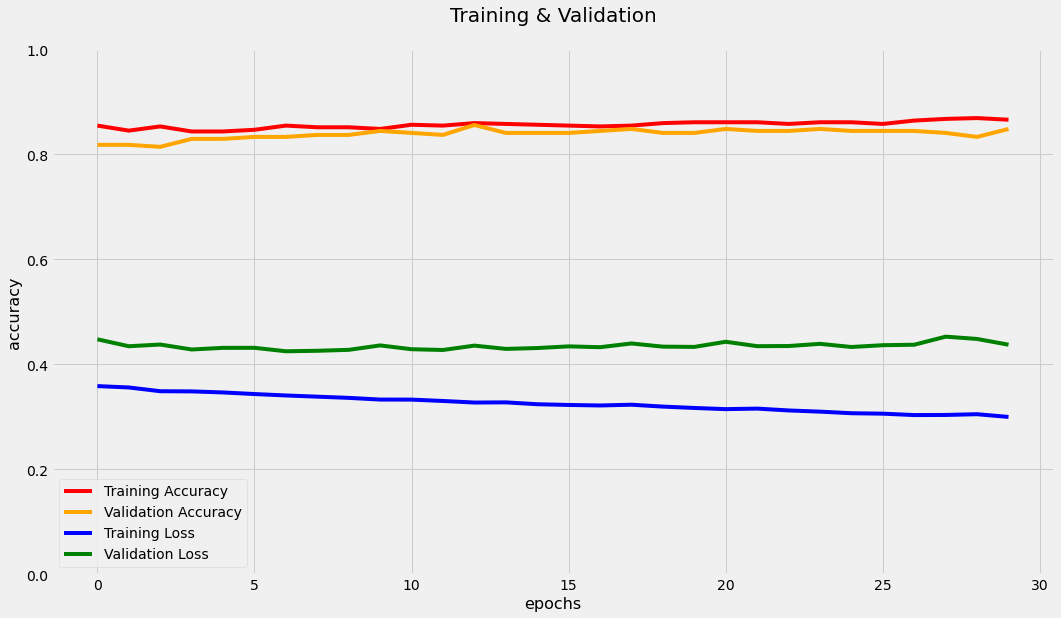

In [65]:
# plotando o gráfico 
plt.figure(figsize=(16, 9))

plt.plot(range(EPOCHS), accuracy, 'r', label='Training Accuracy')
plt.plot(range(EPOCHS), val_accuracy, 'orange', 
         label='Validation Accuracy')

plt.plot(range(EPOCHS), loss, 'b', label='Training Loss')
plt.plot(range(EPOCHS), val_loss, 'g', 
         label='Validation Loss')

plt.legend(loc='best')    # lower left, lower right, upper left, upper rigth, best, center
plt.gca().set_ylim(0, 1)
plt.grid(True)

plt.title('Training & Validation\n', size=20)
plt.xlabel('epochs', size=16)
plt.ylabel('accuracy', size=16)
plt.show();

In [66]:
# visualizando as variáveis local do ambiente
%whos

Variable                 Type                               Data/Info
---------------------------------------------------------------------
CATEGORIES               dict                               n=5
CSV_COLMUNS              list                               n=10
DEFAULTS                 list                               n=5
EPOCHS                   int                                30
LABELS                   list                               n=2
LABEL_COLUMN             str                                survived
MEAN                     ndarray                            4: 4 elems, type `float64`, 32 bytes
NUMERIC_FEATURES         list                               n=4
PackNumericFeatures      type                               <class '__main__.PackNumericFeatures'>
SELECT_COLUMNS           list                               n=5
STD                      ndarray                            4: 4 elems, type `float64`, 32 bytes
TEST_DATA_URL            str                      

In [67]:
# visualizando as variáveis local do ambiente em formato de lista
%who_ls

['CATEGORIES',
 'CSV_COLMUNS',
 'DEFAULTS',
 'EPOCHS',
 'LABELS',
 'LABEL_COLUMN',
 'MEAN',
 'NUMERIC_FEATURES',
 'PackNumericFeatures',
 'SELECT_COLUMNS',
 'STD',
 'TEST_DATA_URL',
 'TRAIN_DATA_URL',
 'absolute_import',
 'accuracy',
 'cat_col',
 'categorical_columns',
 'categorical_layer',
 'desc',
 'division',
 'example_batch',
 'feature',
 'features',
 'functools',
 'get_dataset',
 'history',
 'labels',
 'labels_batch',
 'loss',
 'model',
 'normalize_numeric_data',
 'normalizer',
 'np',
 'numeric_column',
 'numeric_columns',
 'numeric_layer',
 'pack',
 'packed_dataset',
 'packed_test_data',
 'packed_train_data',
 'pd',
 'plt',
 'prediction',
 'predictions',
 'preprocessing_layer',
 'print_function',
 'raw_test_data',
 'raw_train_data',
 'show_batch',
 'survived',
 'temp_dataset',
 'test_accuracy',
 'test_data',
 'test_file_path',
 'test_loss',
 'tf',
 'train_data',
 'train_file_path',
 'unicode_literals',
 'val_accuracy',
 'val_loss',
 'vocab']